 Import libraries

In [103]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from statsmodels.formula.api import ols
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
%matplotlib inline

Import dataset

In [104]:
insurance = pd.read_csv("C:\\Users\\jaanu\\Downloads\\insurance.csv")
insurance

age     sex   bmi  children smoker     region  expenses
0       19  female  27.9         0    yes  southwest  16884.92
1       18    male  33.8         1     no  southeast   1725.55
2       28    male  33.0         3     no  southeast   4449.46
3       33    male  22.7         0     no  northwest  21984.47
4       32    male  28.9         0     no  northwest   3866.86
...    ...     ...   ...       ...    ...        ...       ...
17431   28  female  26.3         3     no  northwest   5312.17
17432   60  female  18.3         0     no  northeast  13204.29
17433   26  female  22.2         0     no  northwest   3176.29
17434   23    male  27.4         1     no  northwest   2789.06
17435   62    male  21.4         0     no  southwest  12957.12

[17436 rows x 7 columns]

# Data Exploration

In [105]:
insurance.head()

age     sex   bmi  children smoker     region  expenses
0   19  female  27.9         0    yes  southwest  16884.92
1   18    male  33.8         1     no  southeast   1725.55
2   28    male  33.0         3     no  southeast   4449.46
3   33    male  22.7         0     no  northwest  21984.47
4   32    male  28.9         0     no  northwest   3866.86

In [106]:
insurance.tail()

age     sex   bmi  children smoker     region  expenses
17431   28  female  26.3         3     no  northwest   5312.17
17432   60  female  18.3         0     no  northeast  13204.29
17433   26  female  22.2         0     no  northwest   3176.29
17434   23    male  27.4         1     no  northwest   2789.06
17435   62    male  21.4         0     no  southwest  12957.12

In [107]:
insurance.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'expenses'], dtype='object')

In [108]:
insurance.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
expenses    float64
dtype: object

In [109]:
insurance.describe()

age           bmi      children      expenses
count  17436.000000  17436.000000  17436.000000  17436.000000
mean      39.240594     30.668192      1.099851  13317.751637
std       14.127044      6.053742      1.202692  12139.935529
min       18.000000     16.000000      0.000000   1121.870000
25%       26.000000     26.300000      0.000000   4746.340000
50%       39.000000     30.400000      1.000000   9447.380000
75%       51.000000     34.800000      2.000000  16657.720000
max       64.000000     53.100000      5.000000  63770.430000

# Data Cleaning

In [110]:
insurance.dropna()

age     sex   bmi  children smoker     region  expenses
0       19  female  27.9         0    yes  southwest  16884.92
1       18    male  33.8         1     no  southeast   1725.55
2       28    male  33.0         3     no  southeast   4449.46
3       33    male  22.7         0     no  northwest  21984.47
4       32    male  28.9         0     no  northwest   3866.86
...    ...     ...   ...       ...    ...        ...       ...
17431   28  female  26.3         3     no  northwest   5312.17
17432   60  female  18.3         0     no  northeast  13204.29
17433   26  female  22.2         0     no  northwest   3176.29
17434   23    male  27.4         1     no  northwest   2789.06
17435   62    male  21.4         0     no  southwest  12957.12

[17436 rows x 7 columns]

Check for NaN values in the dataset

In [111]:
insurance.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
expenses    0
dtype: int64

In [112]:
insurance

age     sex   bmi  children smoker     region  expenses
0       19  female  27.9         0    yes  southwest  16884.92
1       18    male  33.8         1     no  southeast   1725.55
2       28    male  33.0         3     no  southeast   4449.46
3       33    male  22.7         0     no  northwest  21984.47
4       32    male  28.9         0     no  northwest   3866.86
...    ...     ...   ...       ...    ...        ...       ...
17431   28  female  26.3         3     no  northwest   5312.17
17432   60  female  18.3         0     no  northeast  13204.29
17433   26  female  22.2         0     no  northwest   3176.29
17434   23    male  27.4         1     no  northwest   2789.06
17435   62    male  21.4         0     no  southwest  12957.12

[17436 rows x 7 columns]

# Feature Engineering

Binning

In [113]:
bins = [0.0, 18.5, 24.9, 29.9, 60]
labels = ['Underweight', 'Normal', 'Overweight', 'Obese']
insurance['bmi_cat'] = pd.cut(insurance['bmi'], bins, labels=labels)

In [114]:
smoker_data = pd.get_dummies(insurance,columns=['smoker'])
smoker_data 

age     sex   bmi  children     region  expenses      bmi_cat  \
0       19  female  27.9         0  southwest  16884.92   Overweight   
1       18    male  33.8         1  southeast   1725.55        Obese   
2       28    male  33.0         3  southeast   4449.46        Obese   
3       33    male  22.7         0  northwest  21984.47       Normal   
4       32    male  28.9         0  northwest   3866.86   Overweight   
...    ...     ...   ...       ...        ...       ...          ...   
17431   28  female  26.3         3  northwest   5312.17   Overweight   
17432   60  female  18.3         0  northeast  13204.29  Underweight   
17433   26  female  22.2         0  northwest   3176.29       Normal   
17434   23    male  27.4         1  northwest   2789.06   Overweight   
17435   62    male  21.4         0  southwest  12957.12       Normal   

       smoker_no  smoker_yes  
0              0           1  
1              1           0  
2              1           0  
3              1           0  
4              1           0  
...          ...         ...  
17431          1           0  
17432          1           0  
17433          1           0  
17434          1           0  
17435          1           0  

[17436 rows x 9 columns]

# Hypothesis test 1

H0: Premium charges decrease for the person who smokes

HA: Premium charges increase for the person who smokes

To examine whether the charges increase or not for the person who smokes

# One-Way ANOVA Test using statsmodels module

In [115]:
F, p = stats.f_oneway(smoker_data['smoker_no'],smoker_data['smoker_yes'])
# Seeing if the overall model is significant
print('F-Statistic=%.3f, p=%.3f' % (F, p))

F-Statistic=18612.915, p=0.000


# One-Way ANOVA Test using OLS Model 

As we know in regression, we can regress against each input variable and check its influence over the Target variable. 
So, we’ll follow the same approach, the approach we follow in Linear Regression.

In [116]:
model = ols('expenses ~ smoker', insurance).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               expenses   R-squared:                       0.621
Model:                            OLS   Adj. R-squared:                  0.621
Method:                 Least Squares   F-statistic:                 2.855e+04
Date:                Sun, 09 Oct 2022   Prob (F-statistic):               0.00
Time:                        19:56:19   Log-Likelihood:            -1.8026e+05
No. Observations:               17436   AIC:                         3.605e+05
Df Residuals:                   17434   BIC:                         3.605e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      8459.8116     63.491    133.244      0.000    8335.362    8584.261
smoker[T.yes]  2.369e+04    140.217    168.975      0.000    2.34e+04     2.4e+04
==============================================================================
Omnibus:                     1676.706   Durbin-Watson:                   2.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2679.531
Skew:                           0.710   Prob(JB):                         0.00
Kurtosis:                       4.292   Cond. No.                         2.60
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Welch's Test

In [117]:
smoker_yes = insurance[(insurance['smoker'] == 'yes')]
smoker_no = insurance[(insurance['smoker'] == 'no')]

In [118]:
stats.ttest_ind(smoker_yes['expenses'], smoker_no['expenses'], equal_var = False)

Ttest_indResult(statistic=118.81834306856399, pvalue=0.0)

Based on the results from anova and t-test
The p value is 0 which is less than significance level =0.05,sufficient evidence exists to reject the null hypothesis H0,in favour of the alternate hypothesis,HA
We sugggest that there is statistically significant relationship exists between two variables

# Hypothesis test 2

H0: Premium charges decrease with the increase in a person’s BMI

HA: Premium charges increase with the increase in a person’s BMI

To examine whether the charges increase with increase in a person’s BMI or not.

# One-Way ANOVA Test using statsmodels module


In [119]:
bmi_data = pd.get_dummies(insurance,columns=['bmi_cat'])
bmi_data 

age     sex   bmi  children smoker     region  expenses  \
0       19  female  27.9         0    yes  southwest  16884.92   
1       18    male  33.8         1     no  southeast   1725.55   
2       28    male  33.0         3     no  southeast   4449.46   
3       33    male  22.7         0     no  northwest  21984.47   
4       32    male  28.9         0     no  northwest   3866.86   
...    ...     ...   ...       ...    ...        ...       ...   
17431   28  female  26.3         3     no  northwest   5312.17   
17432   60  female  18.3         0     no  northeast  13204.29   
17433   26  female  22.2         0     no  northwest   3176.29   
17434   23    male  27.4         1     no  northwest   2789.06   
17435   62    male  21.4         0     no  southwest  12957.12   

       bmi_cat_Underweight  bmi_cat_Normal  bmi_cat_Overweight  bmi_cat_Obese  
0                        0               0                   1              0  
1                        0               0                   0              1  
2                        0               0                   0              1  
3                        0               1                   0              0  
4                        0               0                   1              0  
...                    ...             ...                 ...            ...  
17431                    0               0                   1              0  
17432                    1               0                   0              0  
17433                    0               1                   0              0  
17434                    0               0                   1              0  
17435                    0               1                   0              0  

[17436 rows x 11 columns]

In [120]:
F, p = stats.f_oneway(bmi_data['bmi_cat_Underweight'],bmi_data['bmi_cat_Normal'],bmi_data['bmi_cat_Overweight'],bmi_data['bmi_cat_Obese'])
# Seeing if the overall model is significant
print('F-Statistic=%.3f, p=%.3f' % (F, p))

F-Statistic=5410.635, p=0.000


# One-Way ANOVA Test using OLS Model 

In [121]:
model_age= ols('expenses ~ bmi', insurance).fit()
model_age.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               expenses   R-squared:                       0.041
Model:                            OLS   Adj. R-squared:                  0.041
Method:                 Least Squares   F-statistic:                     751.1
Date:                Sun, 09 Oct 2022   Prob (F-statistic):          6.23e-162
Time:                        19:56:19   Log-Likelihood:            -1.8835e+05
No. Observations:               17436   AIC:                         3.767e+05
Df Residuals:                   17434   BIC:                         3.767e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    819.0539    464.861      1.762      0.078     -92.120    1730.228
bmi          407.5460     14.871     27.406      0.000     378.398     436.694
==============================================================================
Omnibus:                     3292.463   Durbin-Watson:                   2.003
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5509.794
Skew:                           1.286   Prob(JB):                         0.00
Kurtosis:                       3.987   Cond. No.                         162.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Based on the results the p value is 0 which is less than significance level =0.05,sufficient evidence exists to reject the null hypothesis H0,in favour of the alternate hypothesis,HA We sugggest that there is statistically significant relationship exists between two variables

# Hypothesis test 3

H0: Premium charges decrease with the increase in a person’s Age

HA: Premium charges increase with the increase in a person’s Age

To examine whether the charges increase with increase in the age of the person or not.

# One-Way ANOVA Test using OLS Model 

In [122]:
model = ols('expenses ~ age', insurance).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               expenses   R-squared:                       0.088
Model:                            OLS   Adj. R-squared:                  0.088
Method:                 Least Squares   F-statistic:                     1683.
Date:                Sun, 09 Oct 2022   Prob (F-statistic):               0.00
Time:                        19:56:19   Log-Likelihood:            -1.8791e+05
No. Observations:               17436   AIC:                         3.758e+05
Df Residuals:                   17434   BIC:                         3.758e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   3311.8088    259.209     12.777      0.000    2803.732    3819.885
age          254.9896      6.215     41.027      0.000     242.807     267.172
==============================================================================
Omnibus:                     5064.550   Durbin-Watson:                   2.007
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            11121.650
Skew:                           1.727   Prob(JB):                         0.00
Kurtosis:                       4.839   Cond. No.                         123.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Based on the results the p value is 0 which is less than significance level =0.05,sufficient evidence exists to reject the null hypothesis H0,in favour of the alternate hypothesis,HA We sugggest that there is statistically significant relationship exists between two variables

# Categorical to Numerical Encoding

In [123]:
bins = [0.0, 18.5, 24.9, 29.9, 60]
labels = ['Underweight', 'Normal', 'Overweight', 'Obese']
insurance['bmi_cat'] = pd.cut(insurance['bmi'], bins, labels=labels)

In [124]:
insurance1 = insurance.copy()

In [125]:
le = LabelEncoder()

insurance1['children'] = le.fit_transform(insurance1['children'])
insurance1['smoker'] = le.fit_transform(insurance1['smoker'])
ohe = OneHotEncoder() 

insurance1['sex'] = ohe.fit_transform(insurance1[['sex']]).toarray()

regional_area = pd.DataFrame(ohe.fit_transform(insurance1[['region']]).toarray(), columns = ['NE', 'NW', 'SE', 'SW'])
bmi_bins = pd.DataFrame(ohe.fit_transform(insurance1[['bmi_cat']]).toarray(), 
                        columns= ['Normal', 'Obese', 'Overweight', 'Underweight'])
insurance1 = pd.concat([ insurance1.iloc[:,:2], insurance1.iloc[:,7:8], bmi_bins, insurance1.iloc[:,3:6], regional_area, insurance1.iloc[:,-2:-1]], axis=1)

In [126]:
insurance1

age  sex      bmi_cat  Normal  Obese  Overweight  Underweight  \
0       19  1.0   Overweight     0.0    0.0         1.0          0.0   
1       18  0.0        Obese     0.0    1.0         0.0          0.0   
2       28  0.0        Obese     0.0    1.0         0.0          0.0   
3       33  0.0       Normal     1.0    0.0         0.0          0.0   
4       32  0.0   Overweight     0.0    0.0         1.0          0.0   
...    ...  ...          ...     ...    ...         ...          ...   
17431   28  1.0   Overweight     0.0    0.0         1.0          0.0   
17432   60  1.0  Underweight     0.0    0.0         0.0          1.0   
17433   26  1.0       Normal     1.0    0.0         0.0          0.0   
17434   23  0.0   Overweight     0.0    0.0         1.0          0.0   
17435   62  0.0       Normal     1.0    0.0         0.0          0.0   

       children  smoker     region   NE   NW   SE   SW  expenses  
0             0       1  southwest  0.0  0.0  0.0  1.0  16884.92  
1             1       0  southeast  0.0  0.0  1.0  0.0   1725.55  
2             3       0  southeast  0.0  0.0  1.0  0.0   4449.46  
3             0       0  northwest  0.0  1.0  0.0  0.0  21984.47  
4             0       0  northwest  0.0  1.0  0.0  0.0   3866.86  
...         ...     ...        ...  ...  ...  ...  ...       ...  
17431         3       0  northwest  0.0  1.0  0.0  0.0   5312.17  
17432         0       0  northeast  1.0  0.0  0.0  0.0  13204.29  
17433         0       0  northwest  0.0  1.0  0.0  0.0   3176.29  
17434         1       0  northwest  0.0  1.0  0.0  0.0   2789.06  
17435         0       0  southwest  0.0  0.0  0.0  1.0  12957.12  

[17436 rows x 15 columns]

In [127]:
insurance2 = insurance1.corr()
insurance2 

age       sex    Normal     Obese  Overweight  Underweight  \
age          1.000000  0.027066 -0.089848  0.087029   -0.006595    -0.059573   
sex          0.027066  1.000000  0.022621 -0.042797    0.022813     0.021470   
Normal      -0.089848  0.022621  1.000000 -0.466516   -0.285418    -0.054457   
Obese        0.087029 -0.042797 -0.466516  1.000000   -0.682317    -0.130184   
Overweight  -0.006595  0.022813 -0.285418 -0.682317    1.000000    -0.079647   
Underweight -0.059573  0.021470 -0.054457 -0.130184   -0.079647     1.000000   
children     0.041060 -0.021204  0.001900  0.002777   -0.001228    -0.012591   
smoker      -0.034976 -0.081456  0.008172  0.008567   -0.018655     0.009927   
NE           0.006292  0.002925  0.086690 -0.091715    0.009472     0.077653   
NW          -0.001799  0.005332  0.024841 -0.082075    0.060505     0.034715   
SE          -0.010406 -0.015394 -0.088570  0.166504   -0.090485    -0.075323   
SW           0.006312  0.007723 -0.019714  0.001112    0.023910    -0.034317   
expenses     0.296727 -0.057482 -0.114657  0.202323   -0.116326    -0.046180   

             children    smoker        NE        NW        SE        SW  \
age          0.041060 -0.034976  0.006292 -0.001799 -0.010406  0.006312   
sex         -0.021204 -0.081456  0.002925  0.005332 -0.015394  0.007723   
Normal       0.001900  0.008172  0.086690  0.024841 -0.088570 -0.019714   
Obese        0.002777  0.008567 -0.091715 -0.082075  0.166504  0.001112   
Overweight  -0.001228 -0.018655  0.009472  0.060505 -0.090485  0.023910   
Underweight -0.012591  0.009927  0.077653  0.034715 -0.075323 -0.034317   
children     1.000000  0.004138 -0.026164  0.025526 -0.024577  0.026177   
smoker       0.004138  1.000000  0.000546 -0.032236  0.065497 -0.036306   
NE          -0.026164  0.000546  1.000000 -0.321309 -0.346352 -0.320108   
NW           0.025526 -0.032236 -0.321309  1.000000 -0.346352 -0.320108   
SE          -0.024577  0.065497 -0.346352 -0.346352  1.000000 -0.345057   
SW           0.026177 -0.036306 -0.320108 -0.320108 -0.345057  1.000000   
expenses     0.069631  0.787966  0.006856 -0.038614  0.071493 -0.042469   

             expenses  
age          0.296727  
sex         -0.057482  
Normal      -0.114657  
Obese        0.202323  
Overweight  -0.116326  
Underweight -0.046180  
children     0.069631  
smoker       0.787966  
NE           0.006856  
NW          -0.038614  
SE           0.071493  
SW          -0.042469  
expenses     1.000000

Data Visualisation

Age Vs Expenses

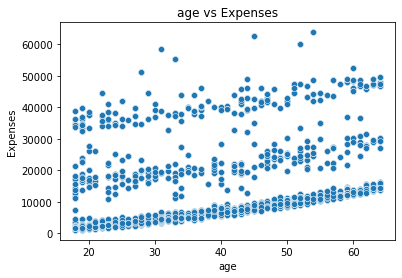

In [128]:
sns.scatterplot(x=insurance['age'], y = insurance['expenses'])
plt.xlabel('age')
plt.ylabel('Expenses')
plt.title('age vs Expenses')
plt.show()

Children Vs Expenses

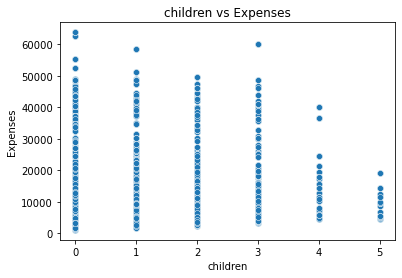

In [129]:
sns.scatterplot(x=insurance['children'], y = insurance['expenses'])
plt.xlabel('children')
plt.ylabel('Expenses')
plt.title('children vs Expenses')
plt.show()

Sex Vs Expenses

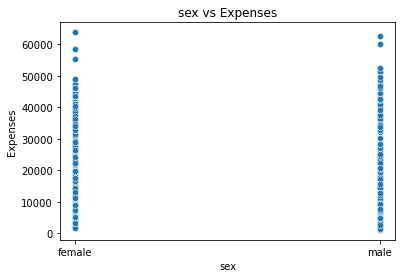

In [130]:
sns.scatterplot(x=insurance['sex'], y = insurance['expenses'])
plt.xlabel('sex')
plt.ylabel('Expenses')
plt.title('sex vs Expenses')
plt.show()

Bmi vs expenses

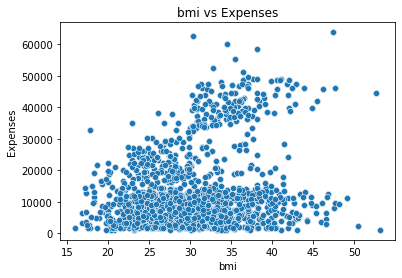

In [131]:
sns.scatterplot(x=insurance['bmi'], y = insurance['expenses'])
plt.xlabel('bmi')
plt.ylabel('Expenses')
plt.title('bmi vs Expenses')
plt.show()

Smoker Rate by region

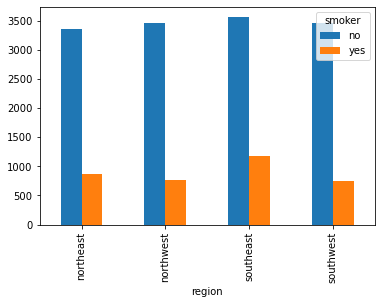

In [132]:
insurance.groupby(['region','smoker']).size().unstack().plot(kind='bar',stacked=False)
plt.show()

# Plotting the heatmap for correlation

Correlation plot between all the variables

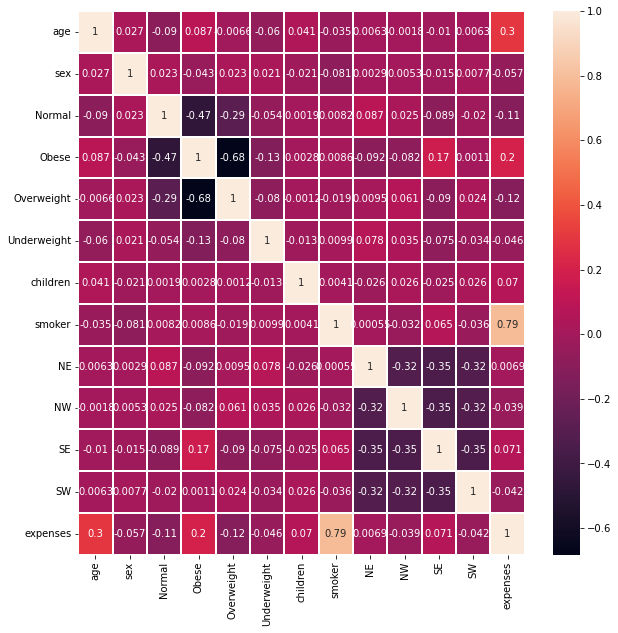

In [133]:
fig, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(insurance1.corr(), annot=True, annot_kws={'size':10},linewidths=0.30)
plt.show()

Correlation plot between numerical variables

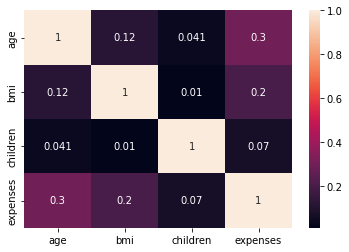

In [134]:
ax = sns.heatmap(insurance.corr(), annot=True)

# Data Visualization

In [135]:
import matplotlib.pyplot as plt
def numerical(num):
    sns.scatterplot(x=insurance[num], y = insurance['expenses'])
    plt.xlabel(num)
    plt.ylabel('Expenses')
    plt.title('{n} vs Expenses'.format(n = num))
    plt.show()


In [136]:
 def categorical(depen_var):
        fig, axes = plt.subplots(1, 2, sharex=True, figsize=(12,8))
        fig.suptitle('{c} vs {n}'.format(c = depen_var.upper(), n = 'Expenses'))
        
        sns.boxplot(ax=axes[0], x = insurance[depen_var], y = insurance['expenses'])
        axes[0].set_title('Boxplot')

        sns.barplot(ax=axes[1],  x = insurance[depen_var], y = insurance['expenses'])
        axes[1].set_title('Bar Chart')

        plt.show()

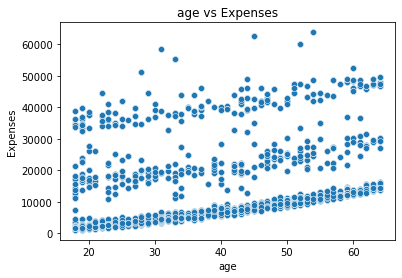

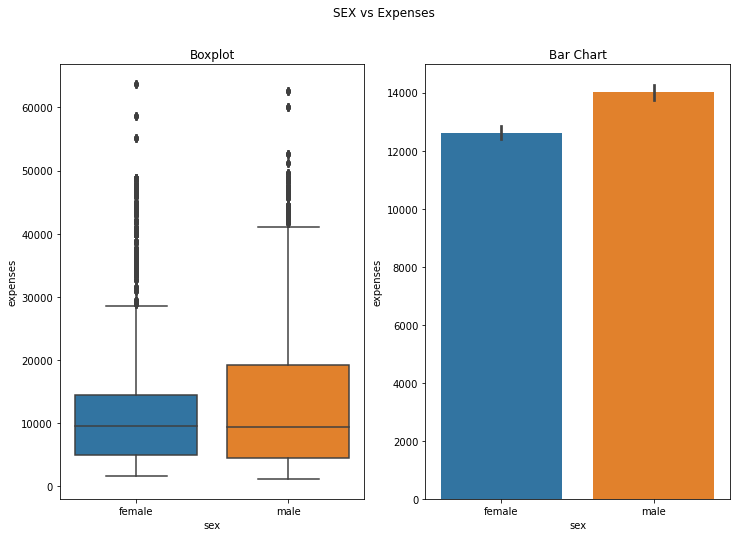

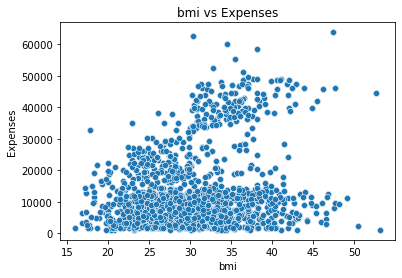

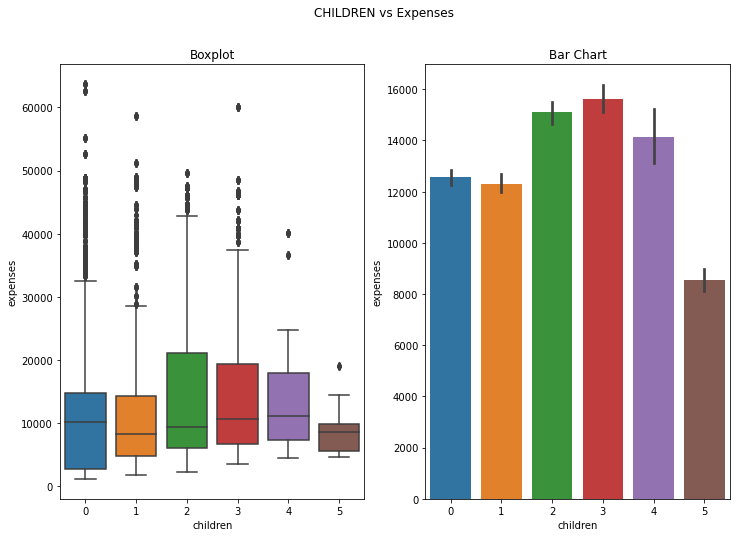

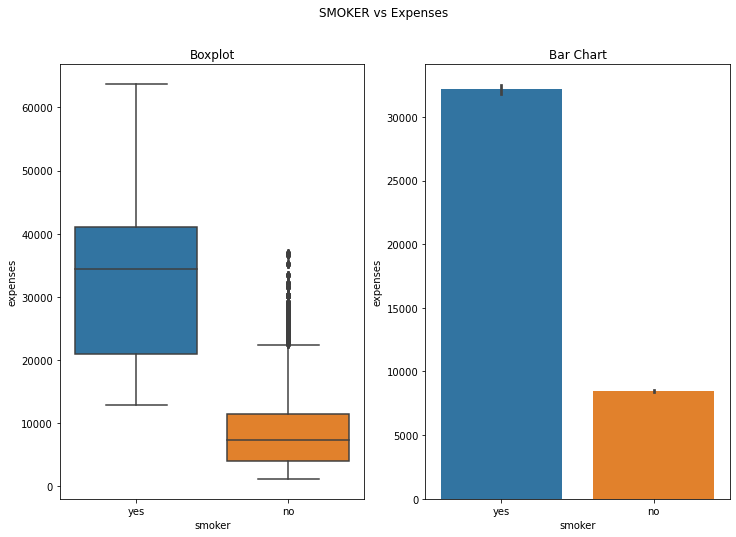

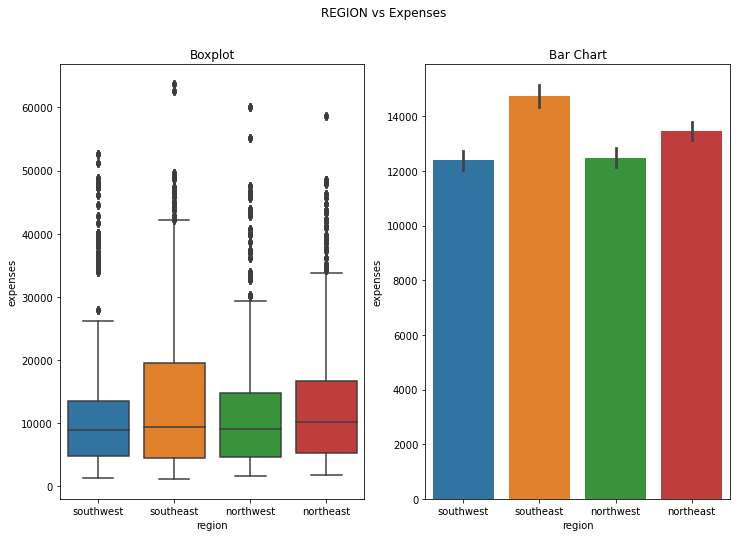

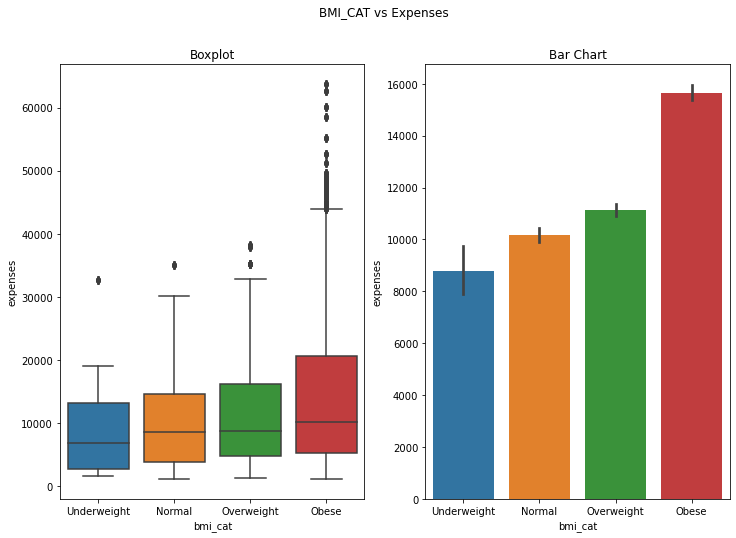

In [137]:
for feature in insurance.columns:
    if feature == 'expenses':
        continue
    elif feature in ['age', 'bmi']:
        numerical(feature)
    else:
        categorical(feature)

In [138]:
insurance1.drop(columns = ['region', 'bmi_cat'], inplace=True)

# Data Standardization

In [139]:
scaler = RobustScaler()
insurance1[['age', 'children', 'expenses']] = scaler.fit_transform(insurance1[['age', 'children', 'expenses']])

# Model Building

In [140]:
y_data = insurance1['expenses']
x_data = insurance1.iloc[:,:12]

In [141]:
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.15)

# Multiple Linear Regression


In [142]:
np.random.seed(321)

#regression object
ml_reg = LinearRegression()

#training the model
ml_reg.fit(x_train, y_train)

#predict values
pred_ml_reg = ml_reg.predict(x_test)

# Polynomial Regression


In [143]:
ply_reg = PolynomialFeatures(degree=2)
x_ply_data  = ply_reg.fit_transform(x_data)
x_ply_train, x_ply_test = train_test_split(x_ply_data, test_size = 0.15)


lin_reg2 = LinearRegression()
lin_reg2.fit(x_ply_train,y_train)
 
pred_ply = lin_reg2.predict(x_ply_test)

# Evaluation Metrics


In [144]:
def evaluate(estimator, pred_val):
    if estimator == lin_reg2:
        x = PolynomialFeatures(degree=2).fit_transform(x_data)
    else:
        x = x_data
    r2 = r2_score(y_test, pred_val)
    rmse = np.sqrt(mean_squared_error(y_test, pred_val))
    score = cross_val_score(estimator, x, y_data, cv=4).mean()
    return r2, rmse, score

In [145]:
#Linear Regression
ml_reg_r2, ml_reg_rmse, ml_reg_cvscore = evaluate(ml_reg, pred_ml_reg)
print(ml_reg_r2, ml_reg_rmse, ml_reg_cvscore)

0.7791083792090816 0.4769645633262629 0.7583497145876076


In [146]:
#Polynomial Regression
ply_r2, ply_rmse, ply_cvscore = evaluate(lin_reg2, pred_ply)
print(ply_r2, ply_rmse, ply_cvscore)

-0.0064293986487289345 1.0180946378003433 0.8714511467851217


# Comparing Model perfomances


In [147]:
r2_scores = [ml_reg_r2, ply_r2]
rmse_scores = [ml_reg_rmse, ply_rmse]

In [148]:
models_comparison = pd.DataFrame([r2_scores, rmse_scores], 
                                 columns = ['Multiple Linear Regression', 'Polynomial Regression'],
                                 index = ['R2 score', 'RMSE score'])

In [149]:
models_comparison


Multiple Linear Regression  Polynomial Regression
R2 score                      0.779108              -0.006429
RMSE score                    0.476965               1.018095